In [23]:
from nba_py.constants import CURRENT_SEASON
print(CURRENT_SEASON)

2016-17


In [65]:
%pylab inline 
#allows you to plot in jupyter notebook

Populating the interactive namespace from numpy and matplotlib


In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [25]:
from nba_py import player

## Search Player

In [58]:
playerid=player.get_player(first_name='Lebron', last_name='James')

## Pick Season

In [59]:
season='2017-18'

#### Name look up

In [60]:
name=player.PlayerSummary(playerid).info()['DISPLAY_FIRST_LAST'][0]

#### team lookup

In [61]:
team_id=player.PlayerSummary(playerid).info()['TEAM_ID'][0]

#### Set object pst equal to the player shot tracking module

In [49]:
pst=player.PlayerShotTracking(playerid, 
                          team_id=0, 
                          measure_type='Base', 
                          per_mode='PerGame', 
                          plus_minus='N', 
                          pace_adjust='N', 
                          rank='N', 
                          league_id='00', 
                          season=season, season_type='Regular Season',
                          po_round='0', outcome='', location='', 
                          month='0', season_segment='', 
                          date_from='', date_to='', 
                          opponent_team_id='0', 
                          vs_conference='', vs_division='', 
                          game_segment='', period='0', 
                          shot_clock_range='', last_n_games='0')

## Import team level stats for comparison, no need to enter team id if it's the same as the player

In [75]:
from nba_py import team
tst=team.TeamShotTracking(team_id, season=season)

In [83]:
team.TeamSummary.info(team_id)

AttributeError: 'numpy.int64' object has no attribute 'json'

#### Shots by Type

In [76]:
ShotsByType=pst.general_shooting().set_index('SHOT_TYPE')
ShotsByTime=pst.touch_time_shooting().set_index('TOUCH_TIME_RANGE')
ShotsByDefense=pst.closest_defender_shooting().set_index('CLOSE_DEF_DIST_RANGE')

In [77]:
#ShotsByTypeTeam=tst.general_shooting().set_index('SHOT_TYPE')
ShotsByTimeTeam=tst.touch_time_shooting().set_index('TOUCH_TIME_RANGE')
ShotsByDefenseTeam=tst.closest_defender_shooting().set_index('CLOSE_DEF_DIST_RANGE')

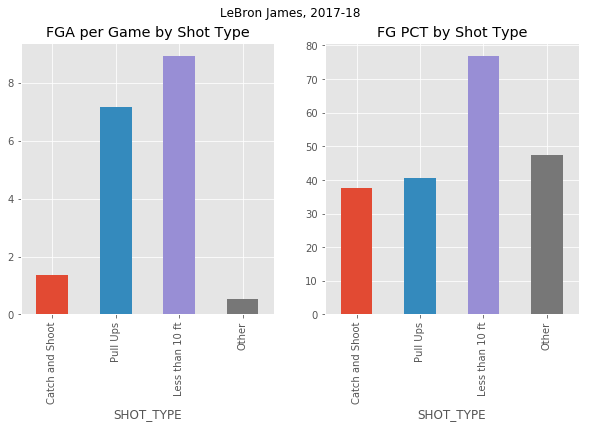

In [78]:
plt.suptitle(name + ', ' + season)
plt.subplot(121)
ShotsByType['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA per Game by Shot Type')
plt.subplot(122)
(ShotsByType['FG_PCT']*100).plot(kind='bar', figsize=(10,5), title='FG PCT by Shot Type')

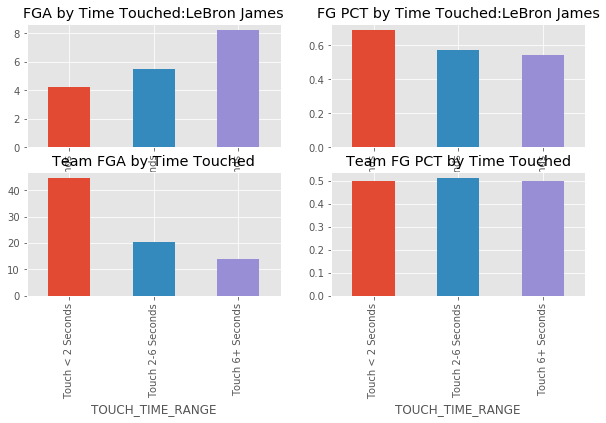

In [79]:
plt.subplot(221)
ShotsByTime['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA by Time Touched:' + name )
plt.subplot(222)
ShotsByTime['FG_PCT'].plot(kind='bar', figsize=(10,5), title='FG PCT by Time Touched:' + name )
plt.subplot(223)
ShotsByTimeTeam['FGA'].plot(kind='bar', figsize=(10,5),  title='Team FGA by Time Touched' )
plt.subplot(224)
ShotsByTimeTeam['FG_PCT'].plot(kind='bar', figsize=(10,5), title='Team FG PCT by Time Touched' )

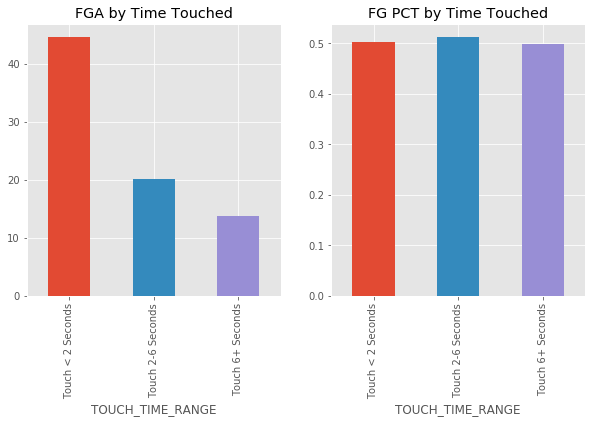

In [69]:
ShotsByTime=tst.touch_time_shooting().set_index('TOUCH_TIME_RANGE')
plt.subplot(121)
ShotsByTime['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA by Time Touched' )
plt.subplot(122)
ShotsByTime['FG_PCT'].plot(kind='bar', figsize=(10,5), title='FG PCT by Time Touched' )

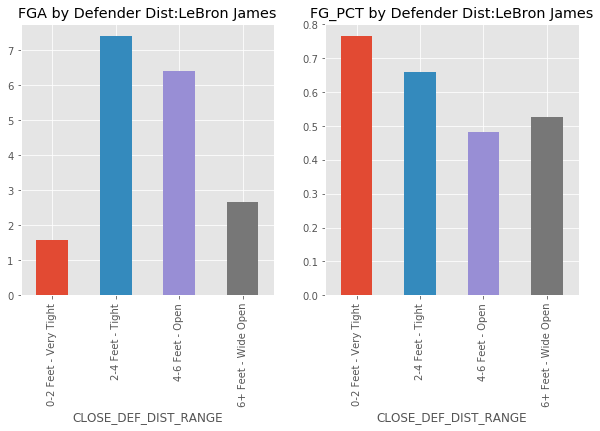

In [70]:
plt.subplot(121)
ShotsByDefense['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA by Defender Dist:' + name )
plt.subplot(122)
ShotsByDefense['FG_PCT'].plot(kind='bar', figsize=(10,5), title='FG_PCT by Defender Dist:' + name )